### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Week 2: Predicting outcomes using classification and clustering

This week we will continue to learn about more different types of machine learning algorithms (classification and clustering) used in predictive analytics. These algorithms are used to analyse business trends and patterns to obtain meaningful business insights. We will also learn about the available Python tools that enable analysts to automate these tasks. Python libraries such as Pandas, Matplotlib, and Seaborn, can provide the tools to help businesses predict trends and make decisions. 

In addition, we will learn how to use these Python tools to create and test classification models, which are useful for analysing categorical data such as product types and customer segments. We will then continue to build on our knowledge of regression analysis techniques by learning how to use binary logistical regression, multinomial logistical regression, and support vector machines.

This is your Notebook. Use it to follow along with the demonstrations, test ideas and explore what is possible. The hands-on experience of writing your own code will accelarate your learning!

For more tips: https://jupyter-notebook.readthedocs.io/en/latest/ui_components.html

### 2.1 Classification using Python

### 2.1.3 Worked example: Checking assumptions

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np

# Read the provided CSV file/data set.
df = pd.read_csv('customer_data.csv') 

# Print the table.
df.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.dtypes

Age                int64
Occupation        object
Status            object
Edu               object
House             object
Loan              object
Comm              object
Month             object
DOW               object
Duration           int64
Campaign           int64
PosDays            int64
Last_out          object
Var_rate         float64
Price_idx        float64
Conf_idx         float64
Month_rate       float64
Quarterly_emp    float64
Target             int64
dtype: object

In [6]:
df.shape

(41188, 19)

In [7]:
# Checking for MISSING VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

# 

#### NO MISSING VALUES

In [8]:
# Target is not in the METADATA, so this is the target for the customer to leave or stay: binary.
# Target is dependant variable, so assumptions 1,2 and 6 (large data) are met

### 2.1.4 Worked example II: Checking for meaningful variables


In [11]:
df['Edu'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [ ]:
# As part of data wrangling, let's change these names
# We create two lists with current titles and output titles

In [12]:
initial_vals = ['illiterate', 'unknown', 'basic', 'high', 'university', 'professional']
new_vals = ['other', 'other', 'pre-school', 'high-school', 'uni', 'masters']

In [ ]:
# Now we create a for loop statement to replace the initial values with the new values (new_vals)

In [13]:
# Create a for loop to replace the values.
for old_val, new_val in zip(initial_vals, new_vals):
    df.loc[df['Edu'].str.contains(old_val),'Edu' ] = new_val

In [14]:
df['Edu'].value_counts()

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

In [15]:
df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [ ]:
# Converting strings to numbers
# import sklearn and define a user define function to make the change

In [16]:
# Import the necessary modules, classes and packages.
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

In [19]:
# Create a class and write a user defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self
    
# View the output.
df.select_dtypes(include='object')

,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Last_out
0,blue-collar,married,pre-school,yes,no,cellular,aug,thu,nonexistent
1,technician,married,other,no,no,cellular,nov,fri,nonexistent
2,management,single,uni,yes,no,cellular,jun,thu,success
3,services,married,high-school,no,no,cellular,apr,fri,nonexistent
4,retired,married,pre-school,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...
41183,retired,married,high-school,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,pre-school,no,no,telephone,may,thu,nonexistent
41185,admin.,single,uni,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,masters,no,yes,telephone,oct,tue,nonexistent


In [20]:
# Order lists of the values for each column containing strings.
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']
House_order = ['no', 'unknown', 'yes']
Loan_order = ['no', 'unknown', 'yes']
Month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
               'nov', 'dec']
DOW_order = ['mon', 'tue', 'wed', 'thu', 'fri']
Last_out_order = ['nonexistent', 'failure', 'success']

In [21]:
# List of values to transform into numbers even though the values are not ordered.
Occupation_list = ['unemployed', 'unknown', 'student', 'blue-collar',
                   'technician', 'housemaid', 'admin.','retired',
                   'self-employed', 'entrepreneur', 'management', 'services']
Status_list = ['unknown', 'single', 'divorced', 'married']
Comm_list = ['cellular', 'telephone']

In [22]:
# Create a list containing all of the list of values.
Encoding_list = [Occupation_list, Status_list, Edu_order, House_order,
                 Loan_order, Comm_list, Month_order, DOW_order, Last_out_order]

In [23]:
# Pick non-numerical columns.
object_cols = df.select_dtypes(include= 'object').columns

In [24]:
#Transform string values to number with our LabelEncoder function.
for idx in range(len(object_cols)): 
    
    le = MyLabelEncoder()
    le.fit(Encoding_list[idx])
    df[object_cols[idx]] = le.transform(df[object_cols[idx]])

In [25]:
# View the DataFrame.
df.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [26]:
# Now we need to BALANCE THE DATA

In [27]:
# Determine if values in a column are balanced.
df['Target'].value_counts()  

0    36548
1     4640
Name: Target, dtype: int64

In [29]:
# There are many more 0 than 1: let's see it visually plotting the 'Target' column data

Text(0.5, 1.0, 'Target Imbalance')

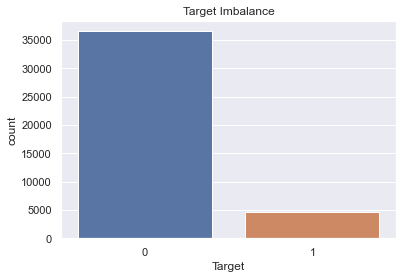

In [30]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Target', data=df)
ax.set_title('Target Imbalance')

In [79]:
# Confirmed: we need to balance the data, for which we need a few more libraries.

# Handles unbalanced data (scikit-learn needed).
!pip install imblearn  
# Optimised linear, algebra, integrations (scientific).
!pip install scipy  
# Simple tools for predictive data analytics.
!pip install scikit-learn  
# Oversampling technique; creates new samples from data.
!pip install SMOTE

In [21]:
# Import necessary packages.
# import imblearn
# from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/Users/javierconde/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/signaltools.py)

In [22]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split


# Set the variables:
X = df.drop('Target', axis = 1)
y = df['Target']

# Apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame
print(os_data_X.head())
os_data_y.head()

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/Users/javierconde/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/signaltools.py)

In [61]:
# Determine if values in a column are balanced by counting the values.
os_data_y['Target'].value_counts()

NameError: name 'os_data_y' is not defined

In [62]:
# And we visualise it 

sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Target', data = os_data_y)
ax.set_title("New Balanced Target")

NameError: name 'os_data_y' is not defined

### 2.1.5 Worked example III: Checking the logistic regression assumptions (Cont.)

In [ ]:
# We now continue checking the two assumptions left: 4 (multicollinearity) and 5
# (Independent variables linearly related to the log odds)

In [63]:
# We study co-multillinearity with Variance Inflation Factor (VIF)

"""Note that a VIF<10 indicates limited to no correlation between independent variables. The closer the VIF is to 1, 
the less correlation between independent variables. However, a VIF>10 indicates a multicollinearity problem due to 
strong correlations. """

'Note that a VIF<10 indicates limited to no correlation between independent variables. The closer the VIF is to 1, \nthe less correlation between independent variables. However, a VIF>10 indicates a multicollinearity problem due to \nstrong correlations. '

In [64]:
# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

In [66]:
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

In [67]:
# View the output.
vif_data

,feature,VIF
0,Age,18.783790
1,Occupation,5.169369
2,Status,9.154831
3,Edu,5.084178
4,House,2.206817
5,Loan,1.207593
6,Comm,3.863707
7,Month,7.971358
8,DOW,2.975899
9,Duration,2.451436


In [ ]:
# The values of Duration, Campaign and Target are less than 10 (even <5) indicating no correlation between 
#these independent variables.

In [68]:
# Droping the columns with VIF > 10 to avoid multicollinearity problems.
df = df.drop(['Price_idx', 'Quarterly_emp'], axis = 1)

# View the DataFrame.
print(df.shape)
df.head()

(41188, 17)


,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Conf_idx,Month_rate,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,-36.1,4.963,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,-42.0,4.021,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,-39.8,0.729,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,-47.1,1.405,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,-31.4,0.869,1


In [69]:
# These two columns have been dropped.

The Box-Tidwell test can be used to explore whether the independent variables () are linearly related to the log odds (Assumption 5). However, the Box-Tidwell test is only applicable to continuous variables. Since we only have one continuous column left, we can do a visual check of the linearity with log odds using this column. When having multiple continuous columns or when we can’t visually see the linear relationship, it’s better to use Box-Tidwell test.  

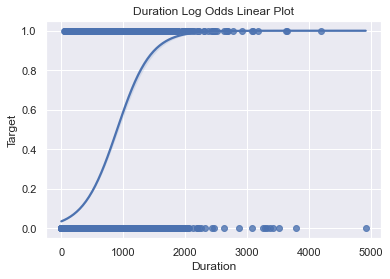

In [70]:
# We are plotting looking for a S-shaped curve.

dur = sns.regplot(x = 'Duration', y= 'Target', data= df,
                  logistic= True).set_title("Duration Log Odds Linear Plot")

In [73]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = df.drop('Target', axis = 1).columns

# Set the independent variable.
X = df[nec_cols]  

# Set the dependent variable.
y = df['Target']  

# Set the logit() to accept y and x as parameters and return the logit object:
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.222768
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41172
Method:                           MLE   Df Model:                           15
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                  0.3672
Time:                        22:09:53   Log-Likelihood:                -9175.4
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0125      0.002      7.237      0.000       0.009       0.016
Occupation     0.0004      0.007      0.058      0.954      -0.014       0.014
Status        -0.1148      0.023     -4.922      0.000      -0.160      -0.069
Edu            0.1352      0.018      7.641      0.000       0.101       0.170
House          0.0069      0.020      0.347      0.728      -0.032       0.046
Loan          -0.0280      0.027     -1.025      0.305      -0.082       0.026
Comm          -0.2290      0.056     -4.086      0.000      -0.339      -0.119
Month          0.0683      0.010      6.583      0.000       0.048       0.089
DOW            0.0179      0.014      1.301      0.193      -0.009       0.045
Duration       0.0046   7.14e-05     63.865      0.000       0.004       0.005
Campaign      -0.0358      0.011     -3.200      0.001      -0.058      -0.014
PosDays       -0.0020      0.000    -18.455      0.000      -0.002      -0.002
Last_out      -0.2079      0.052     -4.000      0.000      -0.310      -0.106
Var_rate      -0.0972      0.036     -2.713      0.007      -0.167      -0.027
Conf_idx       0.0250      0.003      9.088      0.000       0.020       0.030
Month_rate    -0.5066      0.035    -14.426      0.000      -0.575      -0.438
==============================================================================
"""

In [80]:
# Now we need to check the accuracy of this model

# Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

ImportError: cannot import name '_is_constant_feature' from 'sklearn.preprocessing._data' (/Users/javierconde/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py)

In [81]:
# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [82]:
# Previous test would have given result: 'LogisticRegression()', meaning function is active.
# If it is active that means we can determine BLR model’s accuracy with logreg:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

NameError: name 'logreg' is not defined

#### Accuracy of logistic regression classifier on test set: 0.86

The accuracy is 85% which is a great fit for this data set and business question. However, if you had an 85% accuracy fit for a business question based on a ‘ yes’ or ‘no’ answer, it might not be a good fit. To further test the model’s accuracy, we can also employ a confusion matrix to evaluate the accuracy of the classification.

In [19]:
# Create the confusion matrix to test classification accuracy in BLR:
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

NameError: name 'y_test' is not defined

In [84]:
# We can see that 'True Positive' and 'True Negative' are much bigger that "False Positive"/'False Negative'
# Now we ran a classification report to find out precision, recall, f1 score and support

# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

AttributeError: module 'sklearn.utils._openmp_helpers' has no attribute '__pyx_capi__'

#### Precision scores are 85-86%, very high. Our model is accurate.

### 2.1.7 Worked example: Building an MLR model

In [23]:
# Import all the necessary packages: Pandas, NumPy, SciPy, Sklearn, StatsModels.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/Users/javierconde/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/signaltools.py)

In [2]:
# Upload the CSV file.
oysters = pd.read_csv('oysters.csv')  

# Print the columns.
oysters.columns 

Index(['sex', 'length', 'diameter', 'height', 'total_weight', 'raw_weight',
       'intestines_weight', 'shell_weight', 'age'],
      dtype='object')

In [3]:
# View the DataFrame.
oysters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                9484 non-null   object 
 1   length             9484 non-null   float64
 2   diameter           9484 non-null   float64
 3   height             9484 non-null   float64
 4   total_weight       9484 non-null   float64
 5   raw_weight         9484 non-null   float64
 6   intestines_weight  9484 non-null   float64
 7   shell_weight       9484 non-null   float64
 8   age                9484 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 667.0+ KB


In [5]:
oysters.shape

(9484, 9)

In [6]:
oysters.head()

,sex,length,diameter,height,total_weight,raw_weight,intestines_weight,shell_weight,age
0,male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,female,0.575,0.475,0.160,0.8950,0.3605,0.2210,0.2710,9
2,male,0.575,0.450,0.155,0.8860,0.3605,0.2110,0.2575,9
3,infant,0.580,0.460,0.140,0.9265,0.4135,0.1845,0.2700,10
4,infant,0.580,0.460,0.140,0.8295,0.3915,0.1650,0.2380,10


In [10]:
# Apply the value_counts() method, and 
# assign the results to a new DataFrame.
oysters_sex = oysters['sex'].value_counts()
print(oysters_sex)

male      3561
female    3113
infant    2810
Name: sex, dtype: int64


Unlike in the previous BLR example you worked through, the categories have relatively similar counts, so the data is balanced; you won’t need to take extra steps to balance the data in this instance. The next steps will be 
- to separate the dependent variable from the independent variables
- build the model
- create the equation
- test the model’s accuracy. 

In [13]:
# Set the independent and dependent variables:
# Set the independent variable.
X = oysters.drop(['sex'], axis=1)
# Set the dependent variable.
y = oysters['sex']

In [14]:
# Print to check sex column was dropped.
print(list(X.columns.values))

['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight', 'shell_weight', 'age']


In [17]:
# Specify the train and test data sets and 
# use 30% as the ‘test_size’ and a random_state of one.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30, \
                                                                            random_state = 1, stratify=y) 

# Print the shape of all the train and tests sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

AttributeError: module 'sklearn' has no attribute 'model_selection'

Output:
    
['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight',
 'shell_weight', 'age']

(6638, 8)
(2846, 8)
(6638,)
(2846,)

Great! The sex column was dropped and the shape of all four data sets was printed. Here’s what we can confirm:

- X_train had 6,638 rows and eight columns
- X_test had 2,846 rows and eight columns
- y-train had 6,638 rows
- y_test had 2,846 rows. 

The output is correct because 30% of 9,484 values is 2,845.2 (2,846 rounded up as you cannot get a partial oyster). 

In [26]:
# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

In [28]:
# Create a function and set values.
scaler = MinMaxScaler(feature_range = (0,1))   

In [29]:
# Add the X_train data set to the ‘scaler’ function.
scaler.fit(X_train)
# Specify X_train data set.
X_train = scaler.transform(X_train) 
# Specify X_test data set. 
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

Next, you need to start building the MLR model, which is similar to the BLR of the previous topics. Follow along to print the parameters for the model:

In [30]:
# Define the MLR model and  set predictions and parameters.
MLR = LogisticRegression(random_state=0, 
                         multi_class='multinomial', 
                         penalty='none', 
                         solver='newton-cg').fit(X_train, y_train)
# Set the predictions equal to the ‘MLR’ function and 
# specify the DataFrame.
preds = MLR.predict(X_test) 

# Set the parameters equal to the DataFrame and 
# add the ‘get_params’ function. 
params = MLR.get_params() 

# Print the parameters.
print(params)

NameError: name 'LogisticRegression' is not defined

Output if libraries would have worked:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True,
 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 
 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 
 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

In [32]:
# Next, we need to evaluate the MLR intercept and coefficients as follows:

print("Intercept: \n", MLR.intercept_)
print("Coefficients: \n", MLR.coef_)

NameError: name 'MLR' is not defined

Intercept: [-1.84354304 1.2453045 0.59823854] 

Coefficients:
 [[ -7.86123087 9.71436979 4.80820842 1.8175752 -3.37550025
    5.69858878 -1.073312 0.04851337]
 [ 13.84651823 -10.25218773 -6.97271582 -4.06859041 4.29483074
   -8.71920548 1.89845941 -0.11116259]
 [ -5.98528736 0.53781794 2.1645074 2.25101521 -0.91933049
    3.0206167 -0.82514742 0.06264922]]

In [35]:
# Now we create a linear equation from the logit model

# Name the model and [2] Set model to the function.
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model

# Specify how the function returns the results.
result=logit_model.fit()  

# Print the report as a result.summary() function: 
print("Summary for Sex:I/M :\n ", result.summary())

NameError: name 'sm' is not defined

#### The result of this last operation would be a table with all the parametres of the model

In [37]:
# Now we determine the accuracy of the model

# Create and print a confusion matrix:
# y_test as the first argument and the predictions as the second argument. 
confusion_matrix(y_test, preds)

# Transform confusion matrix into an array:
cmatrix = np.array(confusion_matrix(y_test, preds))

# Create the DataFrame from cmatrix array 
pd.DataFrame(cmatrix, index=['female','infant', 'male'],
columns=['predicted_female', 'predicted_infant', 'predicted_male'])

NameError: name 'y_test' is not defined

Now, write the code that will determine the accuracy statistics and create the classification report, which looks like this: 

In [38]:
# Determine accuracy statistics:
print('Accuracy score:', metrics.accuracy_score(y_test, preds))  

# Create classification report:
class_report=classification_report(y_test, preds)

print(class_report)

NameError: name 'metrics' is not defined

### The accuracy of the model is 55%, which is not very accurate and therefore not useful as a predictive model. It seems that there is a 48% chance of success to indicate females by employing size as a variable. Therefore, as breeding programmes are very expensive and time-consuming, it might not be the best way to proceed. While inaccuracy seems to be a negative indicator, in fact, we have saved the oyster breeders a lot of wasted time and money. (Imagine they used size to indicate sex, this would be catastrophic as predictions would only be correct about half the time!)

In [39]:
# If we try to visualize the model (that will look like a MATRIX)

# Import matplotlib to create a visualisation.
import matplotlib.pyplot as plt  

# Define confusion matrix.
cm = confusion_matrix(y_test, preds)  

# Create visualisation for the MLR:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))

# ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', size='xx-large')
        
# Sets the labels.
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)

plt.show()

NameError: name 'y_test' is not defined

In [40]:
print('Confusion Matrix - Screenshot 2022-07-22 at 10.29.39.png')

Confusion Matrix - Screenshot 2022-07-22 at 10.29.39.png


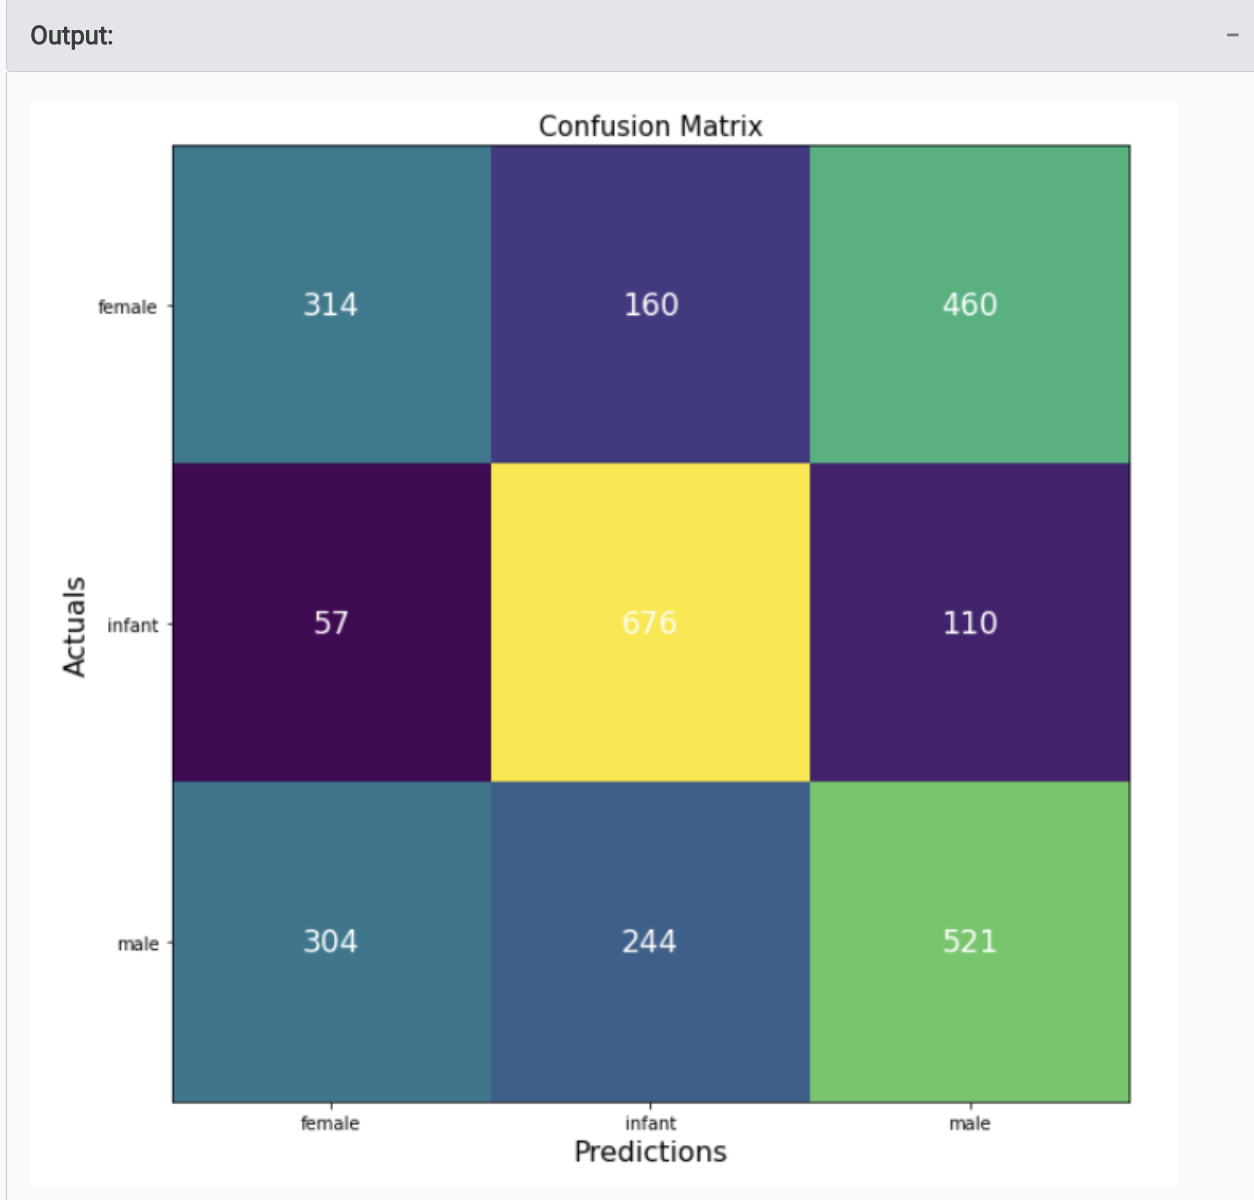

### The oyster research station needed to accurately determine the sex of mature oysters based on size measurements. Using multinomial logistic regression (MLR), we can now see from the output (which is essentially a confusion matrix) that our model correctly classified 314 females as females while it incorrectly classified 160 cases as infants and 460 cases as males. Similarly, 57 cases were incorrectly identified as infants while 676 cases were accurately classified as infants. But there were 110 cases that were incorrectly identified as males. Finally, there were 304 and 244 cases where the model incorrectly classified the males as females and infants respectively. But it also identified 521 accurate cases of male. 

### 2.2 Decision tree using Python

### 2.2.1 Decision trees

# 

### 2.3 Clustering using Python